Load the data from the file and show: the
first few rows, the output of the
.describe() function, the number of rows
and columns (4pt)

In [134]:
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

random_state = 42  # set in order to guarantee repetability of results
data_url1 = 'exam_2021_01_27.csv'
sep1 = ','

df = pd.read_csv(data_url1, sep=sep1,header=None)
df.shape

(150, 5)

In [135]:
df.head()

,0,1,2,3,4
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


In [136]:
df.describe()

,0,1,3,4
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


In [137]:
df = df.dropna(axis=0)
df.head()

,0,1,2,3,4
4,5.0,3.6,a,0.2,0
7,5.0,3.4,a,0.2,0
10,5.4,3.7,a,0.2,0
11,4.8,3.4,a,0.2,0
13,4.3,3.0,a,0.1,0


Since one of the predicting attributes is
ordinal, it must be converted into numeric,
you can use the OrdinalEncoder

In [138]:
from sklearn.preprocessing import OrdinalEncoder
non_numeric_features = df.dtypes.loc[df.dtypes == 'object'].index.values
print("The non-numeric features are:")
print(non_numeric_features)

transf_dtype = np.int32 # type to be used when converting
ordinal_transformer = OrdinalEncoder(dtype = transf_dtype) # we assume the values are encoded so that lexicographic order = intended order
df_2 = df.copy()
df_2[non_numeric_features] = ordinal_transformer.fit_transform(df[non_numeric_features])
df_2.head() #just to check

The non-numeric features are:
[2]


,0,1,2,3,4
4,5.0,3.6,0,0.2,0
7,5.0,3.4,0,0.2,0
10,5.4,3.7,0,0.2,0
11,4.8,3.4,0,0.2,0
13,4.3,3.0,0,0.1,0


In [139]:
y = df_2[4]
X = df_2.drop([4],axis=1)

Split the data into train and test

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , train_size = 0.667
                                                    , random_state = random_state) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))


There are 81 samples in the training dataset
There are 41 samples in the testing dataset
Each sample has 4 features


Model 1: find and show the best
hyperparameter setting with cross validation
on the training set, optimise for the best
accuracy 

In [141]:
# I test the Model 1 for the treeClassifier without setting the parameter
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

model1_param = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,10)), 'min_samples_split': range(2,10)}
estimator = tree.DecisionTreeClassifier()
clf = GridSearchCV(estimator, model1_param, cv=5,
                   scoring='accuracy',
                   return_train_score=False,
                   n_jobs=2,  # this allows using multi-cores
                   )

clf.fit(X_train, y_train)
print("best parameter estimator :", clf.best_params_)
print("best score for accuracy: {}%".format(clf.best_score_*100))
print()

best parameter estimator : {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 8}
best score for accuracy: 96.25%



the accuracy score is:  95.12 %
[[ 8  0  0]
 [ 0 15  2]
 [ 0  0 16]]

[[0.19512195 0.         0.        ]
 [0.         0.36585366 0.04878049]
 [0.         0.         0.3902439 ]]


c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


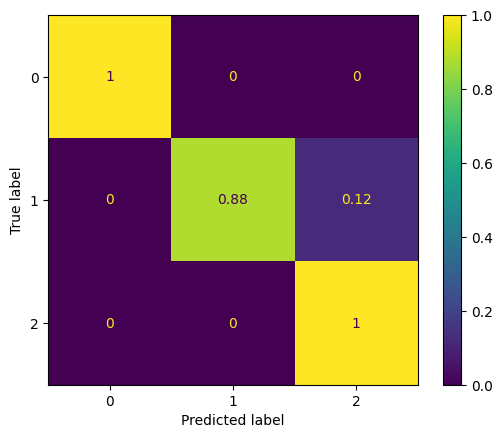

In [154]:
from sklearn.metrics import plot_confusion_matrix

y_true, y_pred = y_test, clf.predict(X_test)
print("the accuracy score is: ",round(accuracy_score(y_test,y_pred)*100, 2),'%' )
plot_confusion_matrix(clf, X_test, y_true, normalize='pred')

conf = confusion_matrix(y_test, y_pred)
print(conf)
print()
print(conf/conf.sum())

In [163]:
#Model2 = SVC
from sklearn.svm import SVC


model2_param = [{'kernel': ['rbf'], 
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100, 1000],                     
                    },
                   ]
estimator2 = SVC()
clf2 = GridSearchCV(estimator, model2_param, cv=5,
                   scoring='accuracy',
                   return_train_score=False,
                   n_jobs=2,  # this allows using multi-cores
                   )

clf2.fit(X_train, y_train)
print("best parameter estimator :", clf2.best_params_)
print("best score for accuracy: {}%".format(clf2.best_score_*100))

best parameter estimator : {'C': 10, 'kernel': 'linear'}
best score for accuracy: 97.5%


the accuracy score is:  92.68 %
[[ 8  0  0]
 [ 0 14  3]
 [ 0  0 16]]


c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


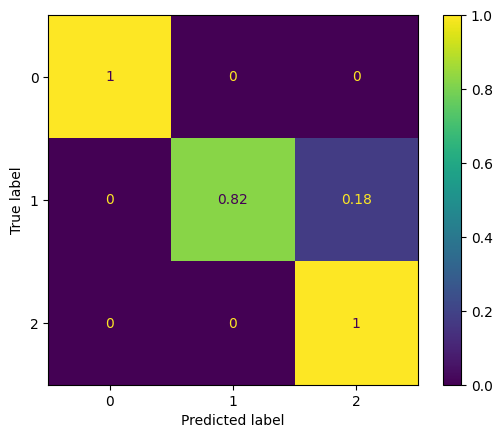

In [173]:
y_true, y_pred2 = y_test, clf2.predict(X_test)
print("the accuracy score is: ",round(accuracy_score(y_test,y_pred2)*100, 2),'%' )
plot_confusion_matrix(clf2, X_test, y_true, normalize='true')

conf2 = confusion_matrix(y_test, y_pred2)
print(conf2)
